In [10]:
import pandas as pd
import seaborn as sns

from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model

# Юнит 3

## Задание 3.3

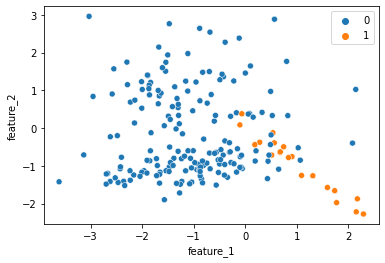

In [2]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=200, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    weights=[1, 0.2], #пропорции классов
    random_state=40 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y);

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

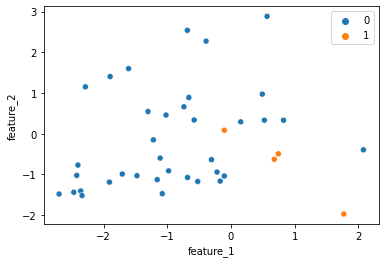

In [5]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

sns.scatterplot(x=X_valid['feature_1'], y=X_valid['feature_2'], hue=y)

## Задание 3.5

In [12]:
#Создаём модель
model = linear_model.LogisticRegression(
    # criterion='entropy', #критерий информативности
    # max_depth=7, #максимальная глубина
    # min_samples_leaf=5, #минимальное число объектов в листе
    # random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.50      0.25      0.33         4

    accuracy                           0.90        40
   macro avg       0.71      0.61      0.64        40
weighted avg       0.88      0.90      0.88        40



## Задание 3.7

In [14]:
#Создаём модель
model_balanced = linear_model.LogisticRegression(
    # criterion='entropy', #критерий информативности
    # max_depth=7, #максимальная глубина
    # min_samples_leaf=5, #минимальное число объектов в листе
    # random_state=42, #генератор случайных чисел
    class_weight='balanced'
)
#Обучаем модель на тренировочной выборке
model_balanced.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_valid_pred = model_balanced.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.33      0.75      0.46         4

    accuracy                           0.82        40
   macro avg       0.65      0.79      0.68        40
weighted avg       0.90      0.82      0.85        40



## Задание 3.11

In [15]:
%pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sample_adder = SMOTE(random_state=42)

X_train_s, y_train_s = sample_adder.fit_resample(X_train, y_train)

model_s = linear_model.LogisticRegression()
model_s.fit(X_train_s, y_train_s)

y_valid_pred = model_s.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.43      0.75      0.55         4

    accuracy                           0.88        40
   macro avg       0.70      0.82      0.74        40
weighted avg       0.92      0.88      0.89        40



# Юнит 4

## Задание 4.3

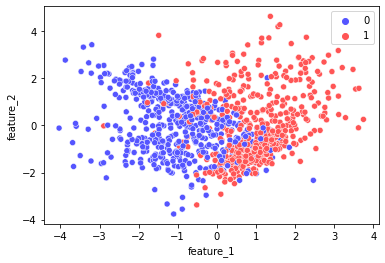

In [26]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');

In [28]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
model_tree = tree.DecisionTreeClassifier(max_depth=10)
model_tree.fit(X_train, y_train)

y_train_pred = model_tree.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_valid_pred = model_tree.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       346
           1       0.97      0.99      0.98       354

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       153
           1       0.83      0.81      0.82       147

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



## Задание 4.6

In [29]:
model_tree_3 = tree.DecisionTreeClassifier(max_depth=3)

model_tree_3.fit(X_train, y_train)

y_train_pred = model_tree_3.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

y_valid_pred = model_tree_3.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       346
           1       0.87      0.89      0.88       354

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       153
           1       0.85      0.84      0.85       147

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# Юнит 6

In [26]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import ensemble #ансамбли

plt.style.use('seaborn') #стиль отрисовки seaborn
%matplotlib inline

In [21]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

In [6]:
shoppers_data = pd.read_csv('../data/online_shoppers_intention.csv')
shoppers_data.head()
shoppers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
dummy_data = pd.get_dummies(shoppers_data)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

## Задание 6.2

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape[0], X_test.shape[0])

9864 2466


## Задание 6.3

In [24]:
model_rf = ensemble.RandomForestClassifier(random_state=42)
validator_skf_5 = model_selection.StratifiedKFold()

metrics_cv = model_selection.cross_validate(
    estimator=model_rf,
    X = X_train,
    y = y_train,
    cv=validator_skf_5,
    scoring='f1',
    return_train_score=True
)

display(metrics_cv)
print('Train k-fold mean f1: {:.2f}'.format(np.mean(metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(metrics['test_score'])))

{'fit_time': array([1.50255704, 2.26634097, 1.32486033, 1.36932802, 0.83589005]),
 'score_time': array([0.0560708 , 0.08525395, 0.04499793, 0.04378796, 0.03956914]),
 'test_score': array([0.64540338, 0.67636364, 0.65497076, 0.61904762, 0.65441176]),
 'train_score': array([1.        , 0.99959033, 1.        , 1.        , 1.        ])}

Train k-fold mean accuracy: 1.00
Valid k-fold mean accuracy: 0.65


## Задание 6.4

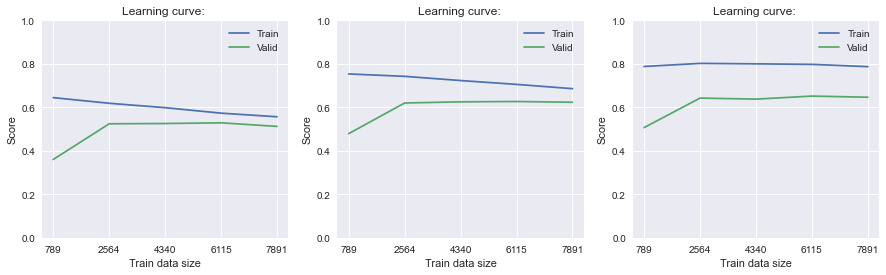

In [22]:
models_rf = [ensemble.RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42, max_depth=5), ensemble.RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42, max_depth=7), ensemble.RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42, max_depth=12)]
kfolder_strat_5 = model_selection.StratifiedKFold(n_splits=5)

fig01, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, model in enumerate(models_rf):
    plot_learning_curve(model, X_train, y_train, kfolder_strat_5, scoring='f1', ax=axes[i], title=f'model {i+1}')

## Задание 6.5

In [27]:
models_rf[1].fit(X_train, y_train)

y_test_pred = models_rf[1].predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



## Задание 6.7

In [34]:
y_train_pred_proba = model_selection.cross_val_predict(models_rf[1], X_train, y_train, cv=kfolder_strat_5, method='predict_proba')
y_train_pred_proba = y_train_pred_proba[: , 1]

display(y_train_pred_proba)

array([0.32248446, 0.03086945, 0.02018385, ..., 0.01006513, 0.52107505,
       0.69764381])

In [36]:
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_train_pred_proba)
display(precision)
display(recall)
display(thresholds)

array([0.15470397, 0.15471966, 0.15473535, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.31061599e-03, 6.55307995e-04, 0.00000000e+00])

array([0.0016146 , 0.00183509, 0.00191163, ..., 0.84249899, 0.84861057,
       0.85521489])

Best threshold = 0.36, F1-Score = 0.69


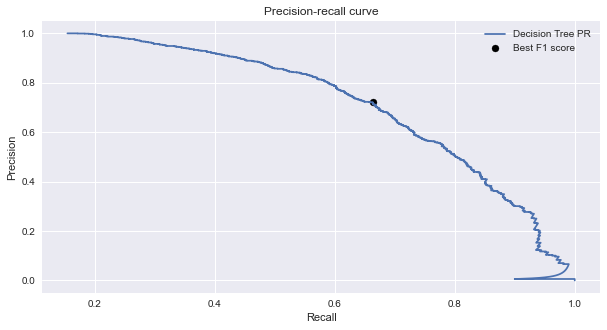

In [38]:
f1_scores = (2 * precision*recall) / (precision + recall)

idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))
 
#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(precision, recall, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(precision[idx], recall[idx], marker='o', color='black', label='Best F1 score')
#Даём графику название и подписываем оси
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

## Задание 6.8

In [48]:
y_test_pred_proba = models_rf[1].predict_proba(X_test)
y_test_pred_proba = pd.Series(y_test_pred_proba[: ,1])

y_test_pred_best = y_test_pred_proba.apply(lambda x: 1 if x > thresholds[idx] else 0)
display(y_test_pred_best)

print(metrics.classification_report(y_test, y_test_pred_best))

0       0
1       0
2       1
3       0
4       0
       ..
2461    0
2462    0
2463    0
2464    0
2465    0
Length: 2466, dtype: int64

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466

